In [58]:
from fastai.basics import *
from fastai.vision import *
from fastai.datasets import *

#import torch
nums = torch.randn(2,2)
nums.cuda()

tensor([[ 0.4991,  0.7701],
        [-0.4230, -1.0149]], device='cuda:0')

In [59]:
datapath = Path('data/WillItLearn_Circles_ObjDetection')
datapath_csv = Path('data/WillItLearn_Circles_ObjDetection/WillItLearn_Circles_ObjDetect.csv')

In [60]:
bs = 64

In [61]:
str(datapath)

'data/WillItLearn_Circles_ObjDetection'

In [113]:
#datapath = Path('data/WillItLearn_Circles_ObjDetection/WillItLearn_Circles_ObjDetect.csv')
#import pandas as pd
from ast import literal_eval

df = pd.read_csv(datapath_csv)
images, lbl_bbox = df.img_name, df.lblname

img2bbox = dict(zip(df.img_name, df.lblname))
get_y_func = lambda o:literal_eval(img2bbox[str(o)])

In [114]:
print(images[1])
d = img2bbox[images[1]]
print(d)
ims = PIL.Image.open(images[1])
ims.show()

data/WillItLearn_Circles_ObjDetection/1_1.png
[[[33, 23, 56, 46]], ['circle']]


In [115]:
datapath

PosixPath('data/WillItLearn_Circles_ObjDetection')

In [116]:
#[data.train_ds[i] for i in range(100,200)]

In [117]:
data = (ObjectItemList.from_folder(datapath)
        #Where are the images? -> in coco
        .random_split_by_pct()                          
        #How to split in train/valid? -> randomly with the default 20% in valid
        .label_from_func(get_y_func)
        #How to find the labels? -> use get_y_func
        #Data augmentation? -> Standard transforas with tfm_y=True
        .databunch(bs=16, collate_fn=bb_pad_collate))
        #Finally we convert to a DataBunch and we use bb_pad_collate

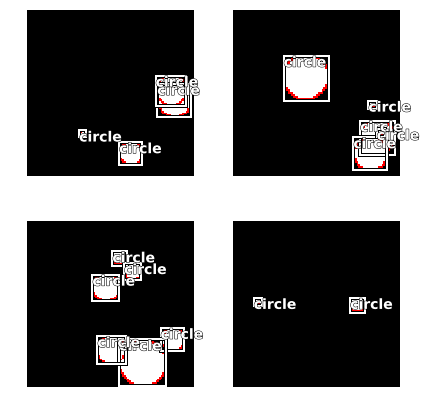

In [118]:
data.show_batch(rows=2, ds_type=DatasetType.Train, figsize=(6,6))

In [143]:
??data.show_batch

In [16]:
#[float(path.name) for path in list(datapath.iterdir()) if not path.name.startswith('models')]

[6.0, 3.0, 0.0, 9.0, 4.0, 7.0, 8.0, 5.0, 1.0, 2.0]

In [119]:
learn = create_cnn(data, models.resnet34)

In [121]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss


TypeError: __call__() takes 3 positional arguments but 4 were given

In [47]:
learn.save('mini_train.reg')


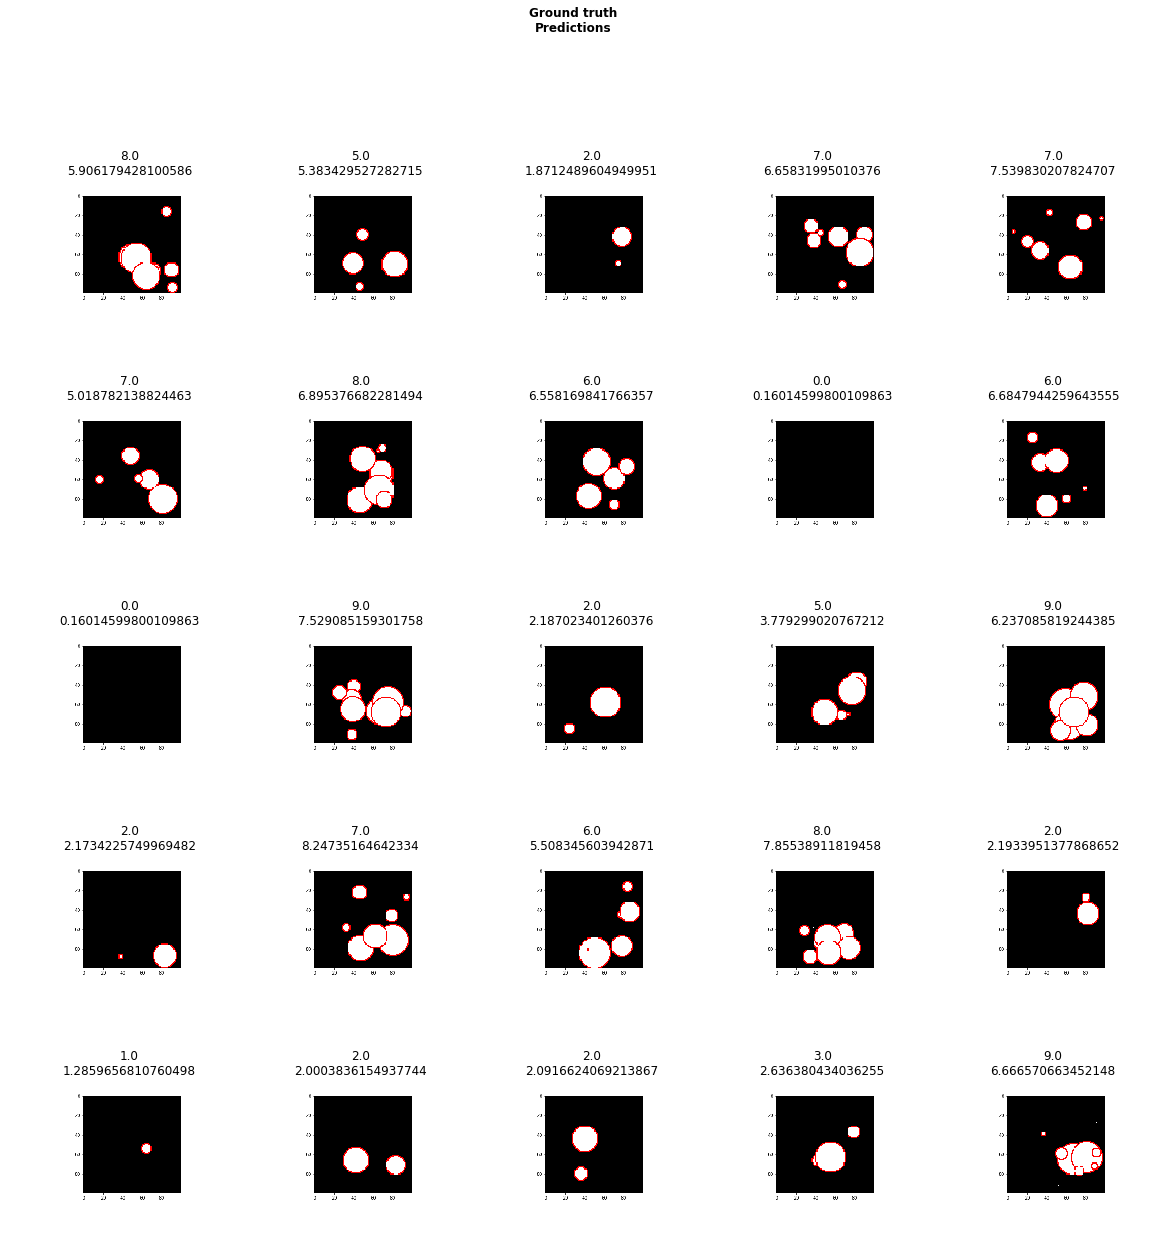

In [48]:
learn.show_results()


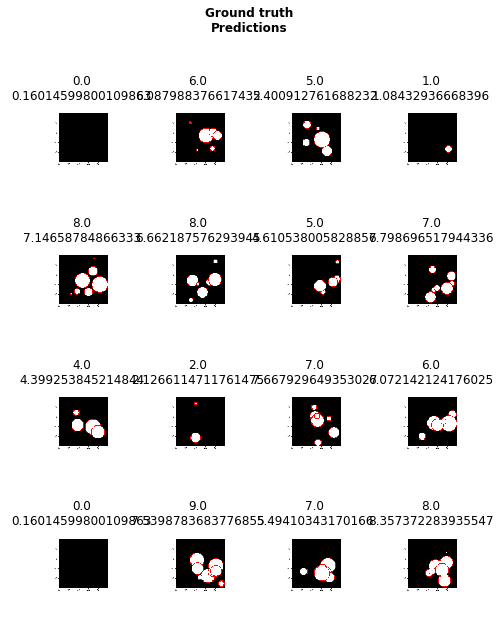

In [49]:
learn.show_results(ds_type=DatasetType.Train, rows=4, figsize=(8,10))
